# **The task is to detect if the patient will have heart disease or not**

**EDA and Data cleaning**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#checking the shape first
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#no null values found

In [ ]:
#describe data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#checking for the null values
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
# seeing non null values and duplicate counts, it feels like the data is cleaned

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


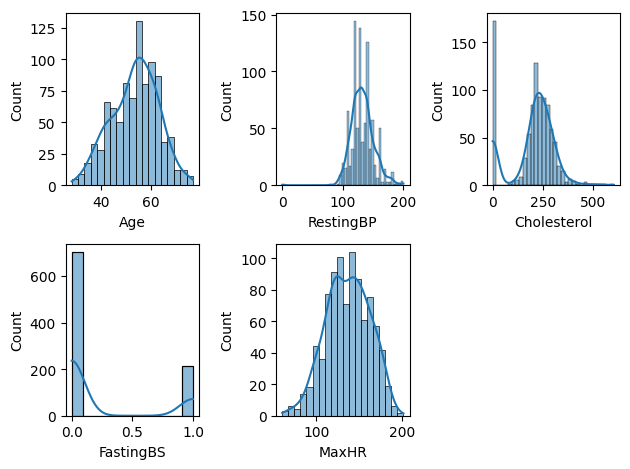

In [ ]:
#lets's see the distribution of numerical variables
def plotting(var, num):
  plt.subplot(2,3,num)
  sns.histplot(df[var], kde = True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('FastingBS', 4)
plotting('MaxHR', 5)

plt.tight_layout()


In [ ]:
#if you see above closely, the resting BP is left skewed, so there must be atleast 1 value on the left, and if you zoom in, you will notice
# that there in fact a person whose resting BP is 0 which in not possible, this means there is a wrong row with Resting BP = 0

df['RestingBP'].value_counts().sort_values(ascending=False).tail(20)

,count
RestingBP,
190,2
165,2
123,2
116,2
94,2
148,2
92,1
113,1
80,1


In [ ]:
df3 = df[df['RestingBP'] != 0]

df3_mean = df3['Cholesterol'].mean()
df3_mean

df.loc[df['RestingBP'] == 0, 'RestingBP'] = df3_mean


/tmp/ipython-input-1042101472.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '199.0163576881134' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['RestingBP'] == 0, 'RestingBP'] = df3_mean


In [ ]:
#checking distribution of heart diseases
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [ ]:
df['Cholesterol'].value_counts().sort_values(ascending=True)

,count
Cholesterol,
337,1
165,1
369,1
152,1
110,1
...,...
216,9
223,10
220,10


In [ ]:
#in the above i can see that there are 172 rows with 0 cholesterol which is practically impossible, which mean we need more cleaning of the data
# 1 way is to drop these rows
# 2nd way is to fill these 0 values with mean of the other cholesterol values

df2 = df[df['Cholesterol'] != 0]
df.shape

df2_mean = df2['Cholesterol'].mean()
df2_mean

# df[df['Cholesterol'] == 0]['Cholesterol'] = df2_mean
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = df2_mean

df

/tmp/ipython-input-2620529413.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '244.6353887399464' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = df2_mean


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


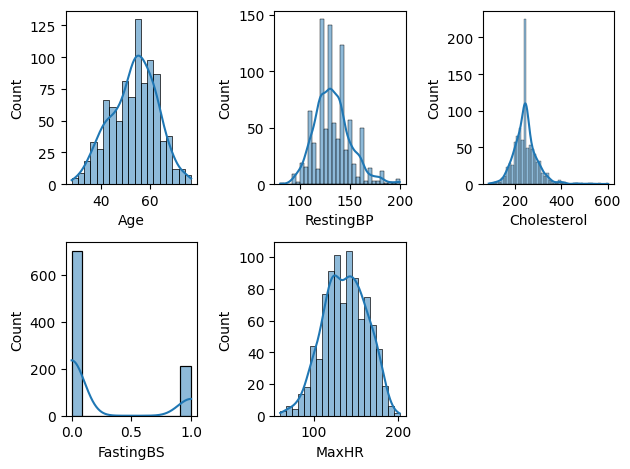

In [ ]:
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('FastingBS', 4)
plotting('MaxHR', 5)

plt.tight_layout()


In [ ]:
# Seeing at the above plot, cholesterol values go upto 600 but is it really possible ?
# Yes it is

<Axes: xlabel='Cholesterol'>

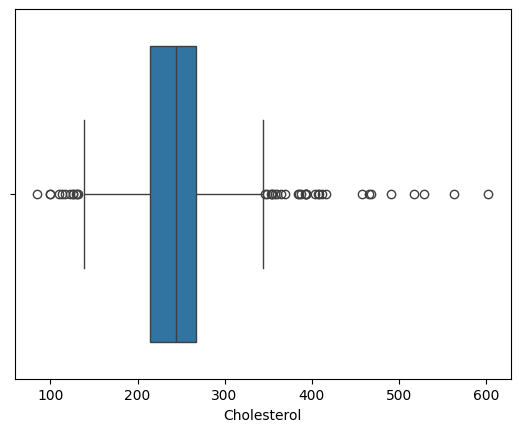

In [ ]:
sns.boxplot(df, x = 'Cholesterol')

In [ ]:
#since the values of HeartDisease are quite close, this is good because if one were significantly bigger than the other, out model will have been trained to detect one more than the other

In [ ]:
#checking 'Sex' variable values and performing label encoding

df['Sex'].value_counts()

,count
Sex,
M,725
F,193


<Axes: xlabel='Sex', ylabel='count'>

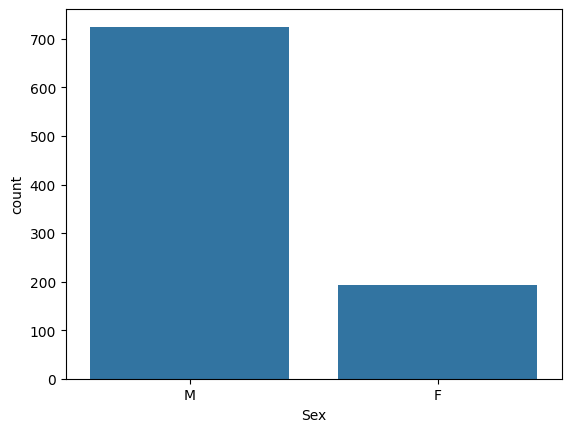

In [ ]:
sns.countplot(x = df['Sex'])

<Axes: xlabel='ChestPainType', ylabel='count'>

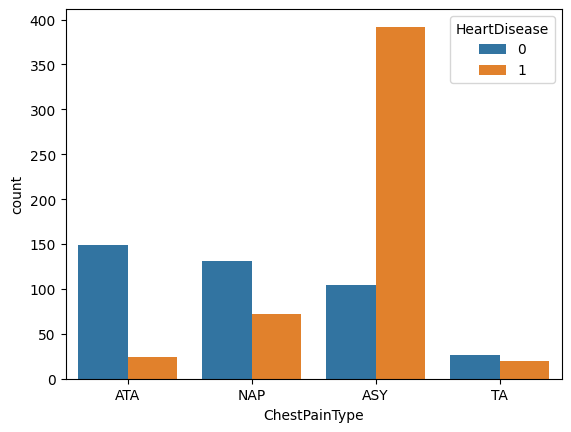

In [ ]:
#using hue = df['HeartDisease'] as that is a categorical variable

sns.countplot(x=df['ChestPainType'], hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

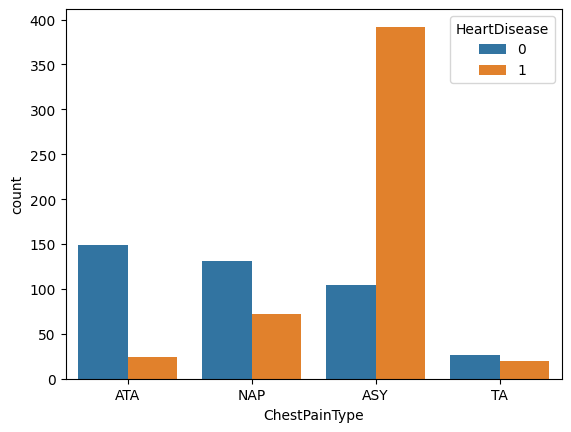

In [ ]:
sns.countplot(x = df['ChestPainType'], hue=df['HeartDisease'])

<Axes: xlabel='RestingBP', ylabel='count'>

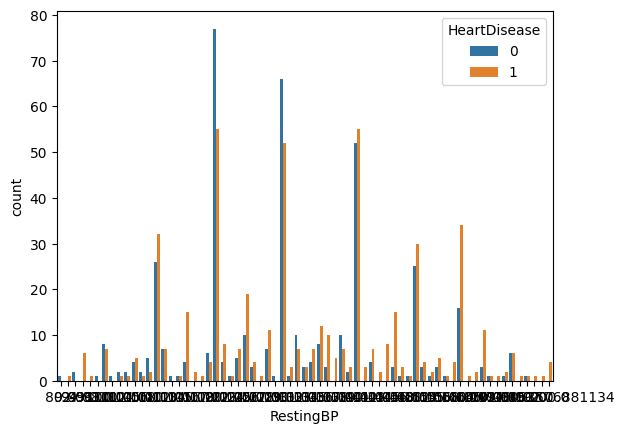

In [ ]:
sns.countplot(x = df['RestingBP'], hue=df['HeartDisease'])
# the above produced clumsy data, we make bins for this

<Axes: xlabel='RestingECG', ylabel='count'>

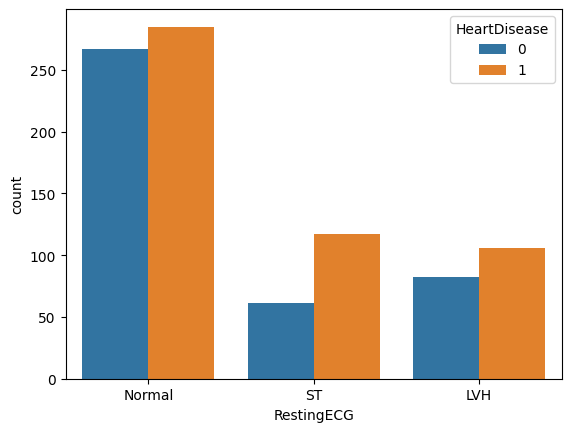

In [ ]:
sns.countplot(x = df['RestingECG'], hue=df['HeartDisease'])

<Axes: xlabel='ST_Slope', ylabel='count'>

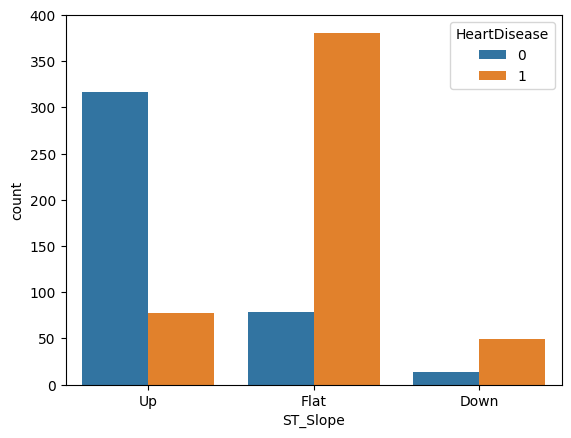

In [ ]:
sns.countplot(x = df['ST_Slope'], hue=df['HeartDisease'])

<Axes: xlabel='Sex', ylabel='count'>

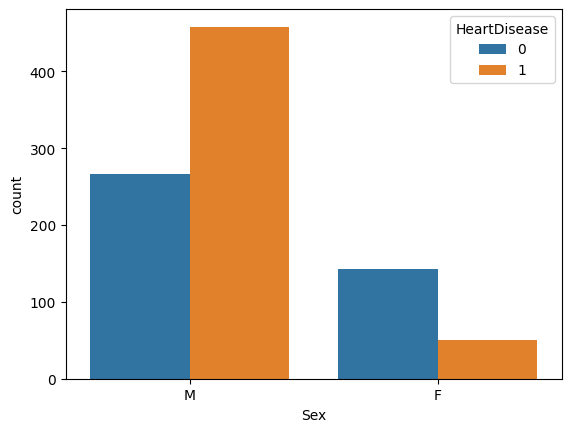

In [ ]:
sns.countplot(x = df['Sex'], hue=df['HeartDisease'])

In [ ]:
df['Sex'] = df['Sex'].map({
    "M" : 0,
    "F" : 1
})
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [ ]:
#checking 'ExerciseAngina' variable values and performing label encoding
df['ExerciseAngina'].value_counts()


,count
ExerciseAngina,
N,547
Y,371


### **Data preprocessing**

In [ ]:
df['ExerciseAngina'] = df['ExerciseAngina'].map({
    "N" : 0,
    "Y" : 1
})
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140.0,289.0,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160.0,180.0,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130.0,283.0,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138.0,214.0,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150.0,195.0,0,Normal,122,0,0.0,Up,0


In [ ]:
# checking resting ecg
df['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [ ]:
df['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140.0,289.0,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160.0,180.0,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130.0,283.0,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138.0,214.0,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150.0,195.0,0,Normal,122,0,0.0,Up,0


In [ ]:
df_encode = pd.get_dummies(df, drop_first=True)
df_encode.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,0,140.0,289.0,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,1,160.0,180.0,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,0,130.0,283.0,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,1,138.0,214.0,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,0,150.0,195.0,0,122,0,0.0,0,False,True,False,True,False,False,True


In [ ]:
df_encode = df_encode.astype(int)

In [281]:
# now applying standard scaling

numerical_colums = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
df_encode[numerical_colums] = scalar.fit_transform(df_encode[numerical_colums])

df_encode


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0,0.407806,0.834754,0,1.382928,0,-0.727592,0,1,0,0,1,0,0,1
1,-0.478484,1,1.511968,-1.210675,0,0.754157,0,0.282891,1,0,1,0,1,0,1,0
2,-1.751359,0,-0.144275,0.722161,0,-1.525138,0,-0.727592,0,1,0,0,0,1,0,1
3,-0.584556,1,0.297390,-0.572651,0,-1.132156,1,0.282891,1,0,0,0,1,0,1,0
4,0.051881,0,0.959887,-0.929194,0,-0.581981,0,-0.727592,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0,-1.248437,0.365619,0,-0.188999,0,0.282891,1,0,0,1,1,0,1,0
914,1.536902,0,0.628639,-0.966725,1,0.164684,0,2.303858,1,0,0,0,1,0,1,0
915,0.370100,0,-0.144275,-2.130180,0,-0.857069,1,0.282891,1,0,0,0,1,0,1,0
916,0.370100,1,-0.144275,-0.159813,0,1.461525,0,-0.727592,1,1,0,0,0,0,1,0


In [284]:
# now we will do feature selection and extraction

#find the code online, no need to memorize this

# Pearson correlation correction
from scipy.stats import pearsonr

selected_features = ['Sex', 'FastingBS', 'ExerciseAngina', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ST_Slope_Flat', 'ST_Slope_Up']

correlations = {
    feature : pearsonr(df_encode[feature], df_encode['HeartDisease'])[0]
    for feature in selected_features
}

correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlations_df = correlations_df.sort_values(by = 'Pearson Correlation', ascending = False)
correlations_df

,Feature,Pearson Correlation
8,ST_Slope_Flat,0.554134
2,ExerciseAngina,0.494282
1,FastingBS,0.267291
7,RestingECG_ST,0.102527
5,ChestPainType_TA,-0.054790
6,RestingECG_Normal,-0.091580
4,ChestPainType_NAP,-0.212964
0,Sex,-0.305445
3,ChestPainType_ATA,-0.401924
9,ST_Slope_Up,-0.622164


In [286]:
# chi square test performs the test between 2 categorical variables

alpha = 0.05

# target variable is not a category so let's make bins for that

from scipy.stats import chi2_contingency

selected_features = ['Sex', 'FastingBS', 'ExerciseAngina', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ST_Slope_Flat', 'ST_Slope_Up']

alpha = 0.05
results = {}

for col in selected_features:

    # Create contingency table
    contingency_table = pd.crosstab(df_encode[col], df_encode['HeartDisease'])

    # Perform Chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    decision = 'Reject Null (Keep feature)' if p < alpha else 'Accept null (reject feature)'

    results[col] = {
        'chi2_statistic': chi2,
        'p_value': p ,
        'decision' : decision
    }

    # print(col + " : " + p.astype(str))
    # Drop feature if not significant
    if p > alpha:
        df_encode = df_encode.drop(columns=col)

# View results
chi2_results_data = pd.DataFrame(results).T.sort_values(by='p_value')
chi2_results_data


,chi2_statistic,p_value,decision
ST_Slope_Up,352.823905,0.0,Reject Null (Keep feature)
ST_Slope_Flat,279.659914,0.0,Reject Null (Keep feature)
ExerciseAngina,222.259383,0.0,Reject Null (Keep feature)
ChestPainType_ATA,146.236323,0.0,Reject Null (Keep feature)
Sex,84.145101,0.0,Reject Null (Keep feature)
FastingBS,64.320679,0.0,Reject Null (Keep feature)
ChestPainType_NAP,40.608711,0.0,Reject Null (Keep feature)
RestingECG_ST,9.135266,0.002507,Reject Null (Keep feature)
RestingECG_Normal,7.327532,0.006791,Reject Null (Keep feature)
ChestPainType_TA,2.273802,0.131577,Accept null (reject feature)
